In [27]:
!pip install pandas sqlalchemy matplotlib seaborn

In [2]:
import pandas as pd
from sqlalchemy import create_engine

# Load the CSV into a DataFrame
csv_file = '201306-citibike-tripdata.csv'
df = pd.read_csv(csv_file)

# Display the first few rows of the DataFrame to verify the data
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,695,2013-06-01 00:00:01,2013-06-01 00:11:36,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,19678,Subscriber,1983.0,1
1,693,2013-06-01 00:00:08,2013-06-01 00:11:41,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,16649,Subscriber,1984.0,1
2,2059,2013-06-01 00:00:44,2013-06-01 00:35:03,406,Hicks St & Montague St,40.695128,-73.995951,406.0,Hicks St & Montague St,40.695128,-73.995951,19599,Customer,NaN,0
3,123,2013-06-01 00:01:04,2013-06-01 00:03:07,475,E 15 St & Irving Pl,40.735243,-73.987586,262.0,Washington Park,40.691782,-73.973730,16352,Subscriber,1960.0,1
4,1521,2013-06-01 00:01:22,2013-06-01 00:26:43,2008,Little West St & 1 Pl,40.705693,-74.016777,310.0,State St & Smith St,40.689269,-73.989129,15567,Subscriber,1983.0,1


In [3]:
# Create an SQLite database using SQLAlchemy
engine = create_engine('sqlite:///:memory:')

# Load the DataFrame into the SQLite database
df.to_sql('citibike_data', engine, index=False, if_exists='replace')

577703

In [4]:
# Number of rows in the dataset
query = "SELECT COUNT(*) FROM citibike_data"
result = pd.read_sql(query, engine)
print("Number of rows in the dataset:", result.iloc[0, 0])

Number of rows in the dataset: 577703


<h2>EXPLORATORY DATA ANALYSIS</h2>

**Q1.How many citibikes are there in NYC?**

In [6]:
# How many citibikes are there in NYC?
query = """
SELECT COUNT(DISTINCT bikeid) AS number_of_bikes
FROM citibike_data
"""
result = pd.read_sql(query, engine)
result

,number_of_bikes
0,5794


In [5]:
# Viewing the first 100 rows of the dataset
query = "SELECT * FROM citibike_data LIMIT 100"
sample_data = pd.read_sql(query, engine)
sample_data.head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,695,2013-06-01 00:00:01,2013-06-01 00:11:36,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,19678,Subscriber,1983.0,1
1,693,2013-06-01 00:00:08,2013-06-01 00:11:41,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,16649,Subscriber,1984.0,1
2,2059,2013-06-01 00:00:44,2013-06-01 00:35:03,406,Hicks St & Montague St,40.695128,-73.995951,406.0,Hicks St & Montague St,40.695128,-73.995951,19599,Customer,NaN,0
3,123,2013-06-01 00:01:04,2013-06-01 00:03:07,475,E 15 St & Irving Pl,40.735243,-73.987586,262.0,Washington Park,40.691782,-73.973730,16352,Subscriber,1960.0,1
4,1521,2013-06-01 00:01:22,2013-06-01 00:26:43,2008,Little West St & 1 Pl,40.705693,-74.016777,310.0,State St & Smith St,40.689269,-73.989129,15567,Subscriber,1983.0,1
5,2028,2013-06-01 00:01:47,2013-06-01 00:35:35,485,W 37 St & 5 Ave,40.750380,-73.983390,406.0,Hicks St & Montague St,40.695128,-73.995951,18445,Customer,NaN,0
6,2057,2013-06-01 00:02:33,2013-06-01 00:36:50,285,Broadway & E 14 St,40.734546,-73.990741,532.0,S 5 Pl & S 5 St,40.710451,-73.960876,15693,Subscriber,1991.0,1
7,369,2013-06-01 00:03:29,2013-06-01 00:09:38,509,9 Ave & W 22 St,40.745497,-74.001971,521.0,8 Ave & W 31 St N,40.750967,-73.994442,16100,Subscriber,1981.0,1
8,1829,2013-06-01 00:03:47,2013-06-01 00:34:16,265,Stanton St & Chrystie St,40.722293,-73.991475,436.0,Hancock St & Bedford Ave,40.682166,-73.953990,15234,Subscriber,1984.0,1
9,829,2013-06-01 00:04:22,2013-06-01 00:18:11,404,9 Ave & W 14 St,40.740583,-74.005509,303.0,Mercer St & Spring St,40.723627,-73.999496,16400,Subscriber,1987.0,1


**Q2.What are the top 20 most popular stations where customers start their trip?**

In [7]:
# Determine the top 20 most popular stations where customers start their trip
query = """
SELECT 
    `start station name`,
    `start station latitude`,
    `start station longitude`,
    COUNT(*) AS number_of_trips
FROM 
    citibike_data
GROUP BY 
    `start station name`, 
    `start station latitude`, 
    `start station longitude`
ORDER BY 
    number_of_trips DESC
LIMIT 20
"""
result = pd.read_sql(query, engine)
result

,start station name,start station latitude,start station longitude,number_of_trips
0,W 20 St & 11 Ave,40.746745,-74.007756,5983
1,E 17 St & Broadway,40.737050,-73.990093,5621
2,Broadway & W 58 St,40.766953,-73.981693,5401
3,Broadway & E 14 St,40.734546,-73.990741,5177
4,Broadway & W 24 St,40.742354,-73.989151,4955
5,Central Park S & 6 Ave,40.765909,-73.976342,4925
6,West Thames St,40.708347,-74.017134,4800
7,West St & Chambers St,40.717548,-74.013221,4529
8,Lafayette St & E 8 St,40.730207,-73.991026,4432
9,8 Ave & W 31 St N,40.750967,-73.994442,4409


**Q3.What is the difference in average trip duration for subscribers vs. non-subscribers?**

In [8]:
# Difference in average trip duration for subscribers vs. non-subscribers
query = """
SELECT 
    usertype,
    COUNT(*) AS num_of_trips, 
    ROUND(AVG(tripduration / 60), 2) AS avg_duration_minutes
FROM 
    citibike_data
GROUP BY 
    usertype
"""
result = pd.read_sql(query, engine)
result

,usertype,num_of_trips,avg_duration_minutes
0,Customer,240319,28.73
1,Subscriber,337384,17.87


**Q4. What are the top routes by subscribers?**

In [9]:
# Top routes by subscribers
query = """
SELECT 
    usertype,  
    `start station name` || ' to ' || `end station name` AS route,  
    COUNT(*) AS number_of_trips,  
    ROUND(AVG(tripduration / 60), 2) AS avg_duration_minutes
FROM 
    citibike_data
WHERE 
    usertype = 'Subscriber'
GROUP BY  
    `start station name`, 
    `end station name`, 
    usertype
ORDER BY  
    number_of_trips DESC
LIMIT 20
"""
result = pd.read_sql(query, engine)
result

,usertype,route,number_of_trips,avg_duration_minutes
0,Subscriber,Central Park S & 6 Ave to Central Park S & 6 Ave,250,28.78
1,Subscriber,West Thames St to West Thames St,149,19.35
2,Subscriber,None,130,11.62
3,Subscriber,Broadway & W 58 St to Broadway & W 58 St,124,22.87
4,Subscriber,None,123,11.63
5,Subscriber,None,120,15.22
6,Subscriber,Vesey Pl & River Terrace to Vesey Pl & River T...,110,14.43
7,Subscriber,None,109,11.18
8,Subscriber,None,99,11.88
9,Subscriber,West Thames St to Vesey Pl & River Terrace,98,9.49


**Number of trips by age and gender for users under 90 years old**

In [17]:
# Number of trips by age and gender for users under 90 years old
query = """
SELECT 
    (2017 - CAST(`birth year` AS INTEGER)) AS age,
    COUNT(*) AS total_count, 
    SUM(CASE WHEN gender = 1 THEN 1 ELSE 0 END) AS number_of_males,
    SUM(CASE WHEN gender = 2 THEN 1 ELSE 0 END) AS number_of_females,
    SUM(CASE WHEN gender = 0 THEN 1 ELSE 0 END) AS number_of_unknown
FROM 
    citibike_data
WHERE 
    (2017 - CAST(`birth year` AS INTEGER)) <= 90
    AND `birth year` IS NOT NULL
GROUP BY 
    age
ORDER BY 
    age
"""
result = pd.read_sql(query, engine)
result
print("Number of trips by age and gender:\n", result)

Number of trips by age and gender:
     age  total_count  number_of_males  number_of_females  number_of_unknown
0    20          198              157                 41                  0
1    21          268              235                 33                  0
2    22          426              324                 98                  4
3    23          319              219                100                  0
4    24          752              616                136                  0
..  ...          ...              ...                ...                ...
64   84           21               20                  1                  0
65   85           23               23                  0                  0
66   87            2                2                  0                  0
67   88            1                1                  0                  0
68   90            3                3                  0                  0

[69 rows x 5 columns]


In [18]:
# 9. Exploring bike routes by gender
# For female
query9_female = """
SELECT 
    CONCAT(`start station name`, " to ", `end station name`) AS route,  
    COUNT(*) AS number_of_trips 
FROM citibike_data
WHERE gender = 2 -- female
GROUP BY 
    `start station name`, `end station name`
ORDER BY number_of_trips DESC
LIMIT 5;
"""
result = pd.read_sql(query, engine)
result

,age,total_count,number_of_males,number_of_females,number_of_unknown
0,20,198,157,41,0
1,21,268,235,33,0
2,22,426,324,98,4
3,23,319,219,100,0
4,24,752,616,136,0
...,...,...,...,...,...
64,84,21,20,1,0
65,85,23,23,0,0
66,87,2,2,0,0
67,88,1,1,0,0


<h2>DESCRIPTIVE ANALYSIS</h2>

In [34]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,5.777030e+05,577703.000000,577703.000000,577703.000000,559644.000000,559644.000000,559644.000000,577703.000000,337382.000000,577703.000000
mean,1.372570e+03,439.228836,40.732436,-73.991251,441.910624,40.732146,-73.991244,17617.434516,1974.644945,0.710431
std,9.028063e+03,337.240318,0.021423,0.013002,345.448311,0.021507,0.013105,1677.518719,10.780255,0.678268
min,6.100000e+01,72.000000,40.646607,-74.017134,72.000000,40.646607,-74.017134,14529.000000,1899.000000,0.000000
25%,5.140000e+02,309.000000,40.717400,-74.001768,309.000000,40.716887,-74.001971,16161.000000,1968.000000,0.000000
50%,8.740000e+02,404.000000,40.734546,-73.990741,403.000000,40.734232,-73.990741,17638.000000,1977.000000,1.000000
75%,1.398000e+03,482.000000,40.749013,-73.981948,482.000000,40.748549,-73.981923,19066.000000,1983.000000,1.000000
max,3.876479e+06,3020.000000,40.771522,-73.950048,3020.000000,40.771522,-73.950048,20625.000000,1997.000000,2.000000


In [35]:
# Count the most popular start stations
most_common_start = df['start station name'].value_counts().head(10)

# Count the most popular end stations
most_common_end = df['end station name'].value_counts().head(10)

# Display the results
print("Most Common Start Stations:")
print(most_common_start)

print("\nMost Common End Stations:")
print(most_common_end)

Most Common Start Stations:
start station name
W 20 St & 11 Ave          5983
E 17 St & Broadway        5621
Broadway & W 58 St        5401
Broadway & E 14 St        5177
Broadway & W 24 St        4955
Central Park S & 6 Ave    4925
West Thames St            4800
West St & Chambers St     4529
Lafayette St & E 8 St     4432
8 Ave & W 31 St N         4409
Name: count, dtype: int64

Most Common End Stations:
end station name
W 20 St & 11 Ave          5742
E 17 St & Broadway        5530
Broadway & W 58 St        5308
Central Park S & 6 Ave    5290
West Thames St            4871
Broadway & E 14 St        4865
Broadway & W 24 St        4758
West St & Chambers St     4470
9 Ave & W 14 St           4312
8 Ave & W 31 St N         4084
Name: count, dtype: int64


In [41]:
# Gender distribution
gender_distribution = df['gender'].value_counts()

# Calculate the average age of users (current year - birth year)
df['age'] = 2024 - df['birth year']
average_age = df['age'].mean()

# Display gender distribution and average age
print("Gender Distribution (0 = Unknown, 1 = Male, 2 = Female):")
print(gender_distribution)

print(f"\nAverage Age of Users: {average_age:.1f} years")


Gender Distribution (0 = Unknown, 1 = Male, 2 = Female):
gender
1    263492
0    240748
2     73463
Name: count, dtype: int64

Average Age of Users: 49.4 years


In [42]:
# Calculate average trip duration in minutes
average_trip_duration = df['tripduration'].mean() / 60  # Convert seconds to minutes

# Shortest and longest trip
shortest_trip = df['tripduration'].min() / 60  # minutes
longest_trip = df['tripduration'].max() / 60  # minutes

# Display results
print(f"Average Trip Duration: {average_trip_duration:.2f} minutes")
print(f"Shortest Trip Duration: {shortest_trip:.2f} minutes")
print(f"Longest Trip Duration: {longest_trip:.2f} minutes")

Average Trip Duration: 22.88 minutes
Shortest Trip Duration: 1.02 minutes
Longest Trip Duration: 64607.98 minutes


<h2>DATA VISUALIZATION</h2>

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn visuals
sns.set(style='whitegrid')

**Popular Start and End Stations**

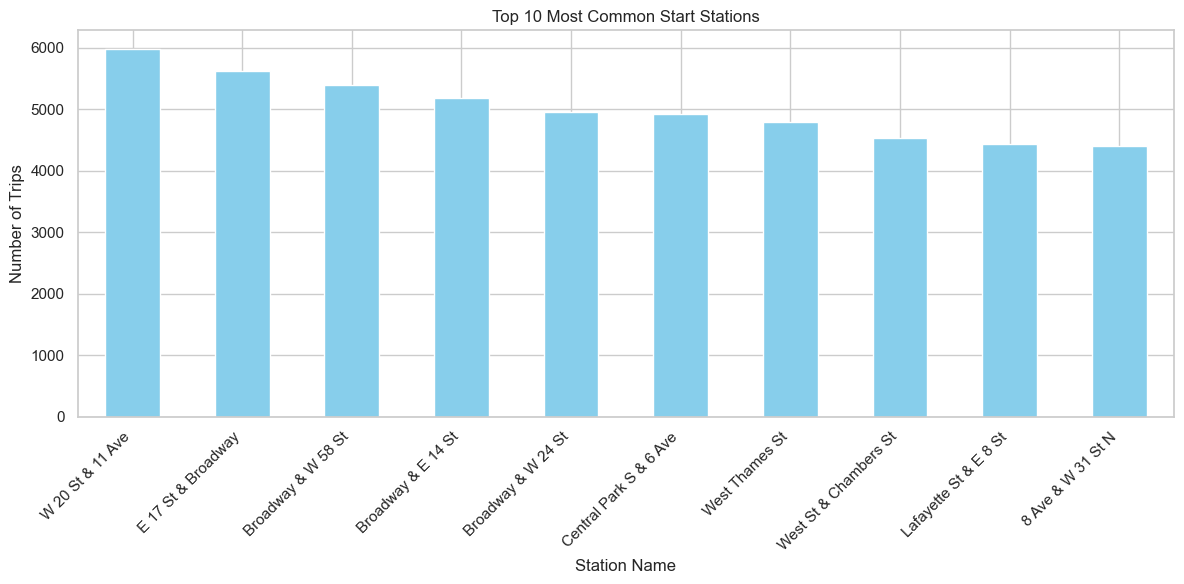

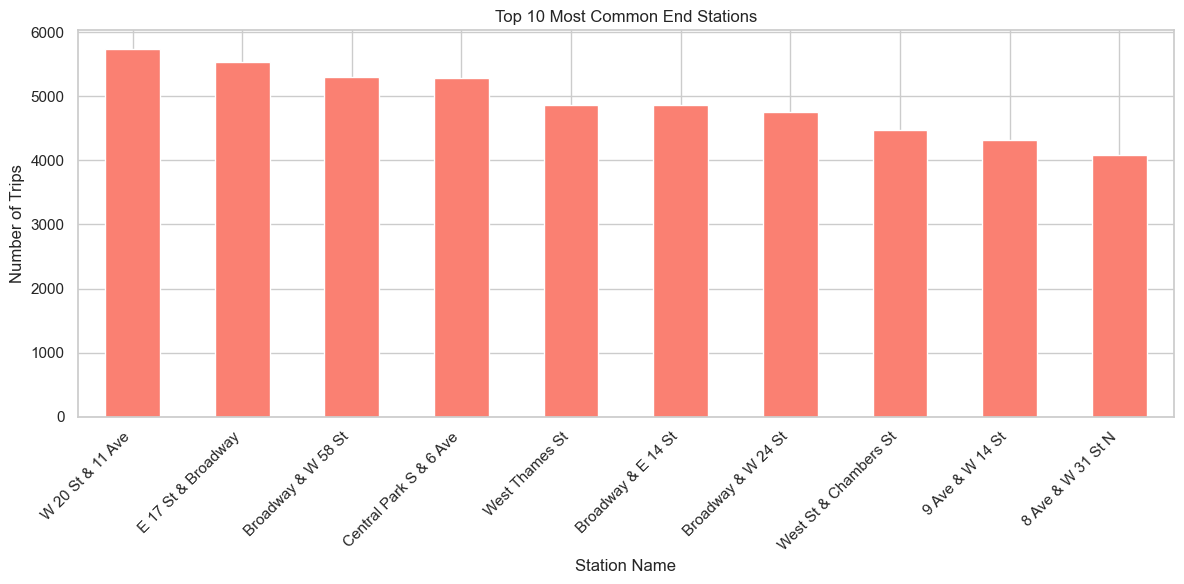

In [44]:
# Plot for most common start stations
plt.figure(figsize=(12, 6))
most_common_start.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Start Stations')
plt.xlabel('Station Name')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot for most common end stations
plt.figure(figsize=(12, 6))
most_common_end.plot(kind='bar', color='salmon')
plt.title('Top 10 Most Common End Stations')
plt.xlabel('Station Name')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**User Demographics Visualization**

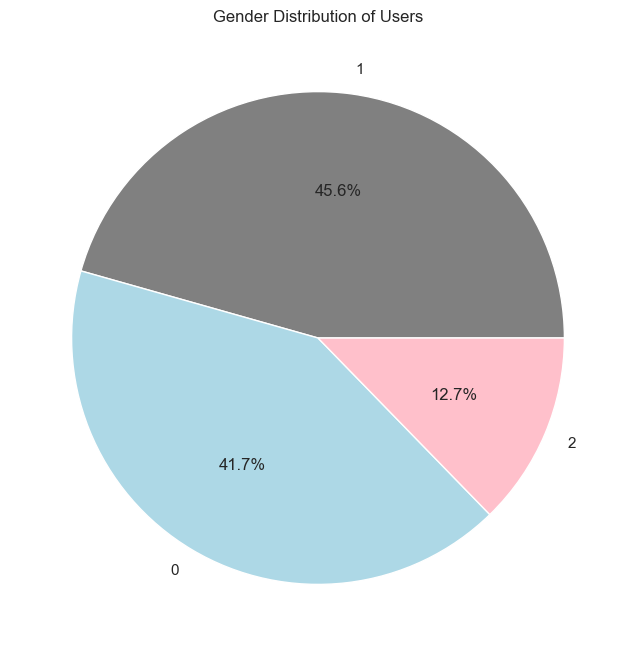

In [45]:
# Plot for gender distribution
plt.figure(figsize=(8, 8))
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['grey', 'lightblue', 'pink'])
plt.title('Gender Distribution of Users')
plt.ylabel('')  # Remove y-label for clarity
plt.show()

**Trip Duration Analysis**

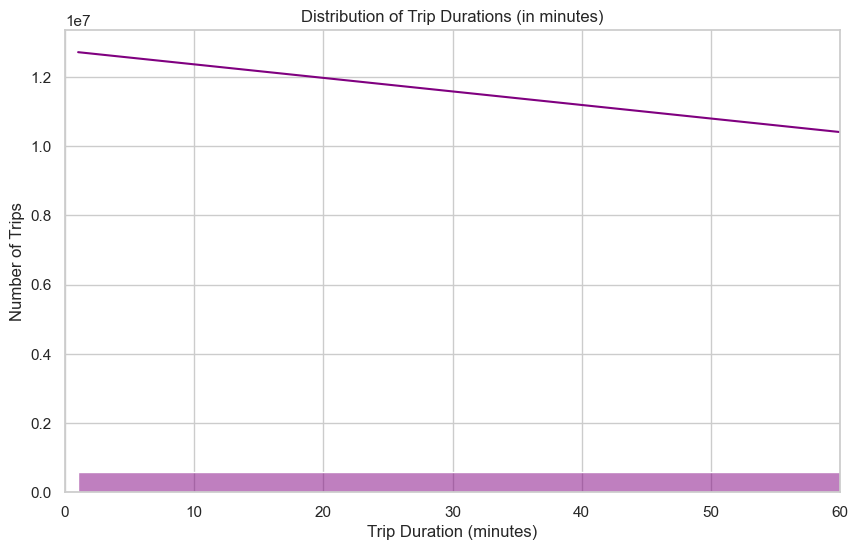

In [47]:
# Plot the distribution of trip durations
plt.figure(figsize=(10, 6))
sns.histplot(df['tripduration'] / 60, bins=50, kde=True, color='purple')
plt.title('Distribution of Trip Durations (in minutes)')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Number of Trips')
plt.xlim(0, 60)  # Focus on trips up to 60 minutes for clarity
plt.show()

**Hourly Trip Analysis**

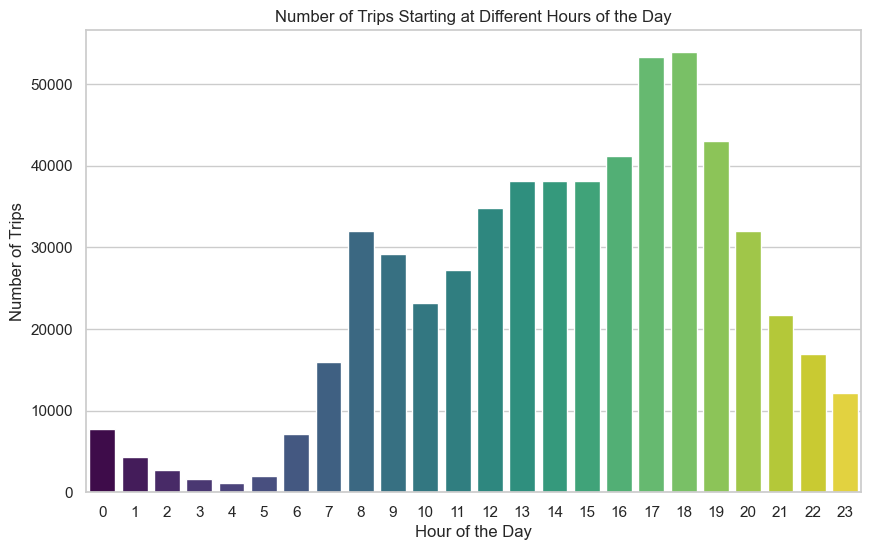

In [53]:
# Plotting the trips per hour with palette and hue assigned
plt.figure(figsize=(10, 6))
sns.countplot(x='start_hour', data=df,  hue='start_hour', palette='viridis', legend=False)
plt.title('Number of Trips Starting at Different Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.show()
